In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

def create_fig(figsize=(8,5), dpi=150):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig

In [2]:
df = pd.read_csv('./data/train_V2.csv')
df.shape

(4446966, 29)

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## เลือกเฉพาะ Solo FPP

Solo ไม่มี DBNOs กับ revives

In [4]:
df = df[df['matchType'] == 'solo-fpp']
df.drop(labels=['DBNOs', 'revives'], axis=1, inplace=True)
df.shape

(536762, 27)

## ตรวจค่า NaN

In [5]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(536761, 27)

## จำนวนคนเล่นในแต่ละแมทช์

In [7]:
df['matchId'].unique().shape

(5678,)

In [8]:
player_per_match = df.groupby(['matchId']).count()['Id']

Text(0.5, 0, 'player in match')

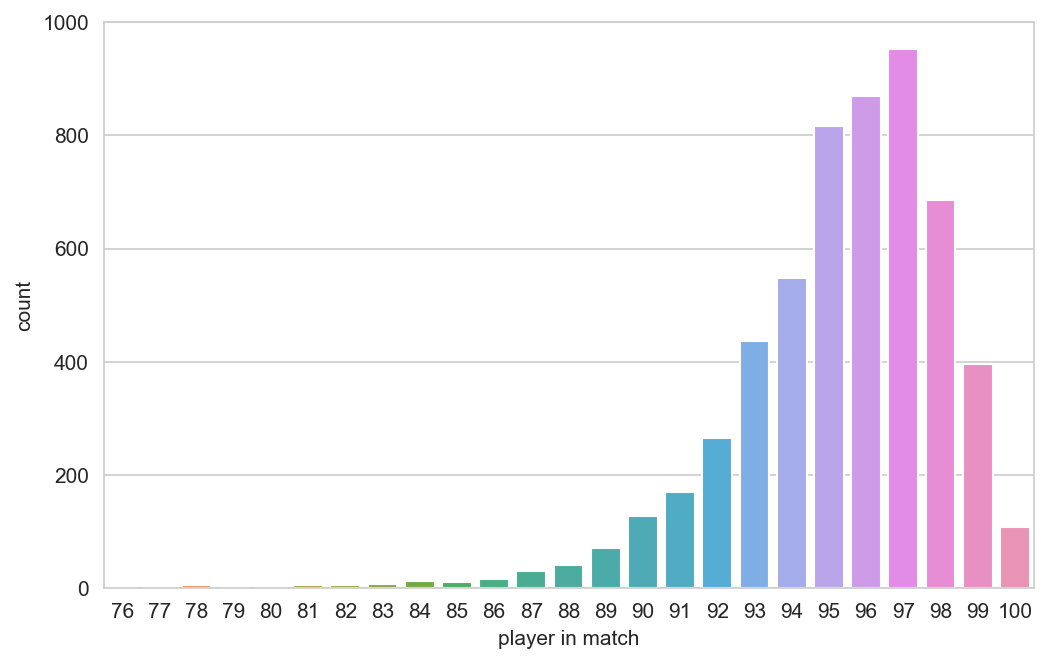

In [9]:
create_fig()
sns.countplot(player_per_match[player_per_match >= 75])
plt.xlabel('player in match')

Text(0.5, 0, 'maxPlace')

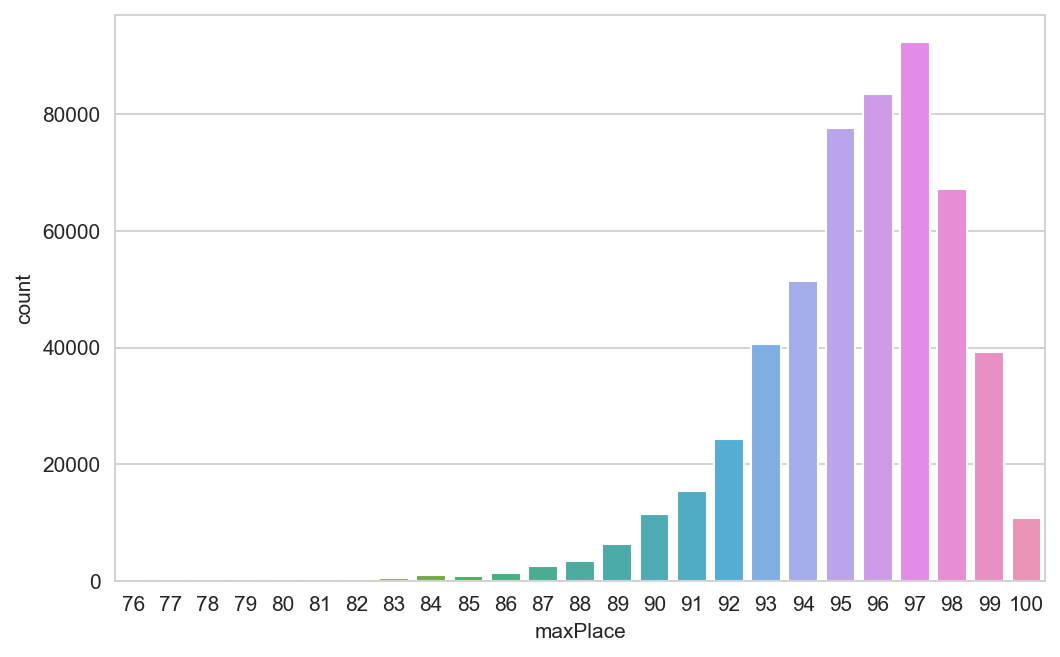

In [10]:
create_fig()
col = 'maxPlace'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

Text(0.5, 0, 'numGroups')

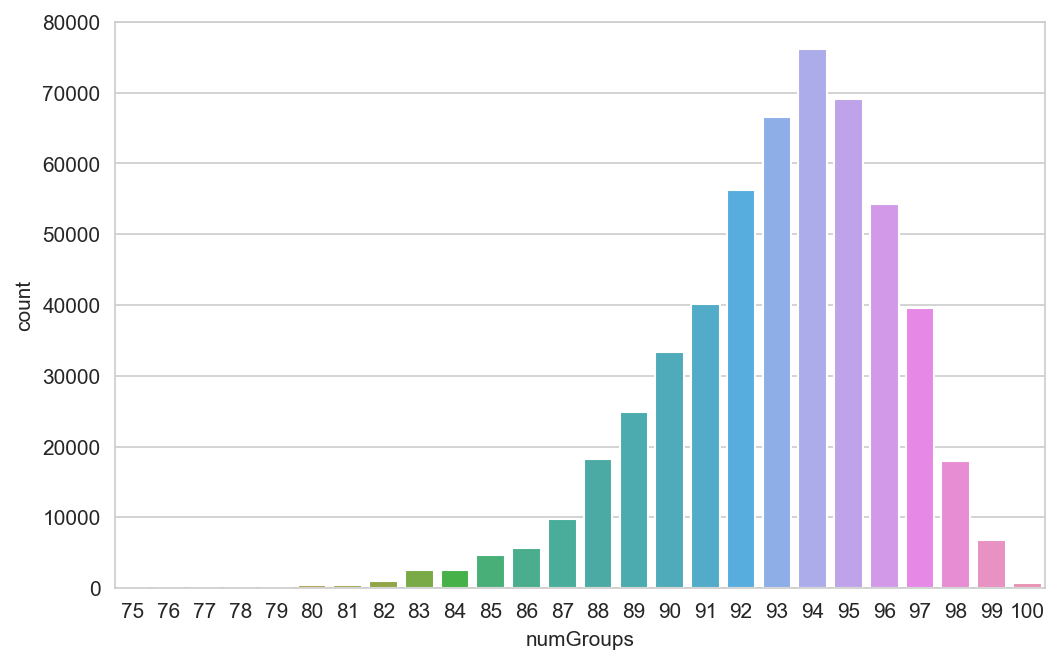

In [11]:
create_fig()
col = 'numGroups'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

## drop Id
ดรอป feature ที่ไม่เกี่ยวข้อง

In [12]:
train = df.drop(labels=['Id', 'groupId', 'matchId', 'maxPlace', 'numGroups'], axis=1)
train.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,45,0,1,1,58.53,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,0,0,8.538,0,0,48,1000,0,0,0.00,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,0,1,324.200,1,5,5,986,4,1,49.83,...,-1,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,0,3,254.300,0,12,13,0,2,1,36.00,...,1536,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,0,0,136.900,0,0,37,0,1,1,22.83,...,1500,0.0,0,0.00,0,0,270.70,1,0,0.3474


## sampling เพื่อความเร็วในการแสดงผล

In [13]:
n_sample = 20000
train = train.sample(n_sample)

## count plot

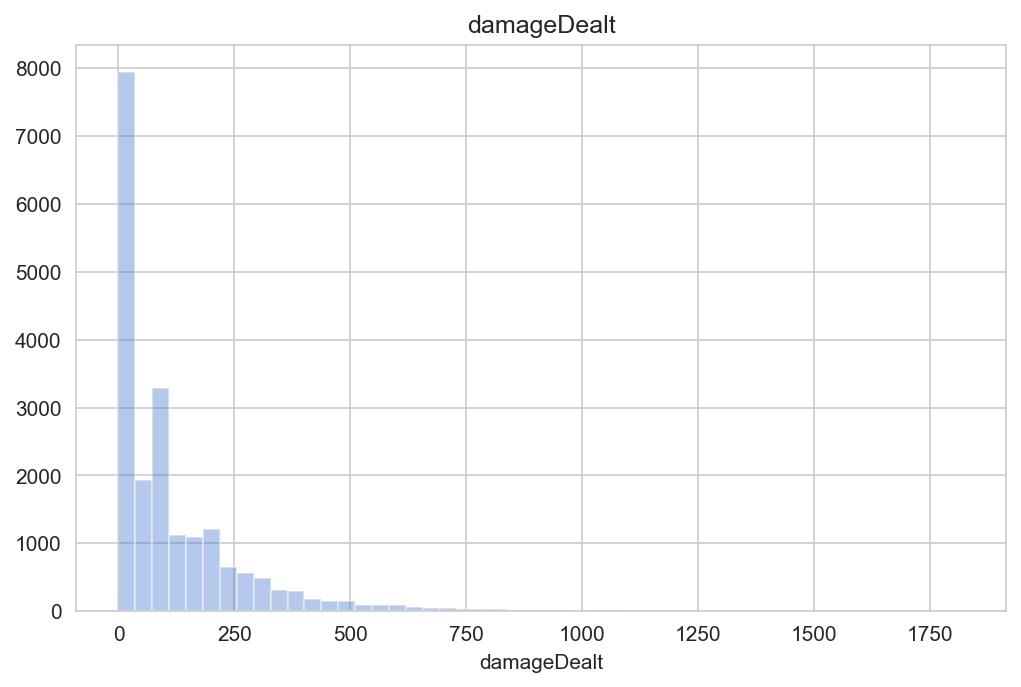

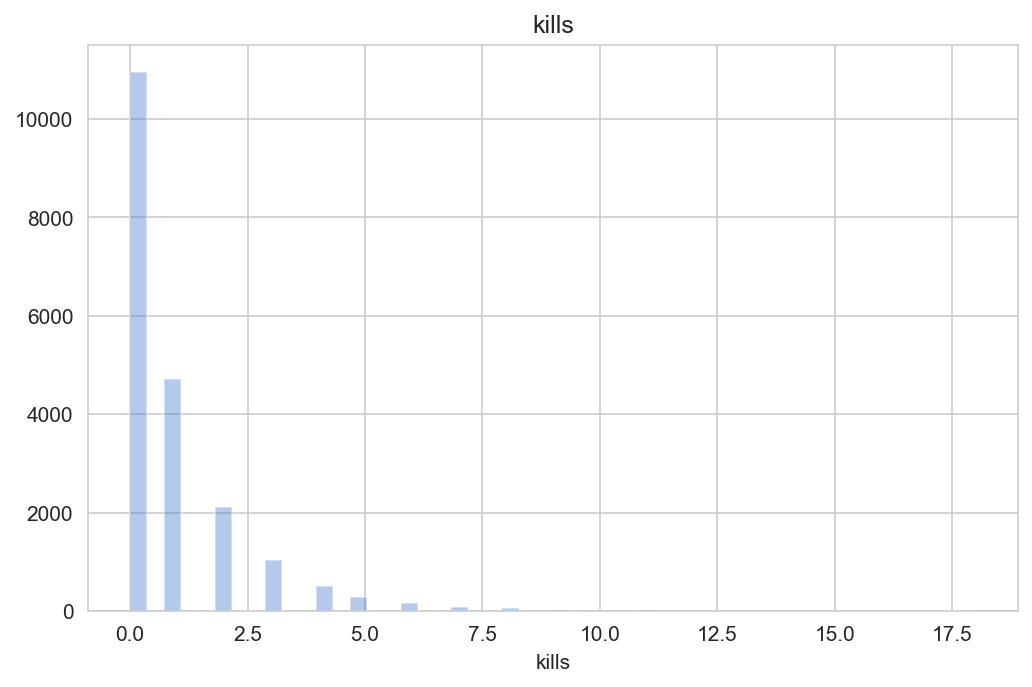

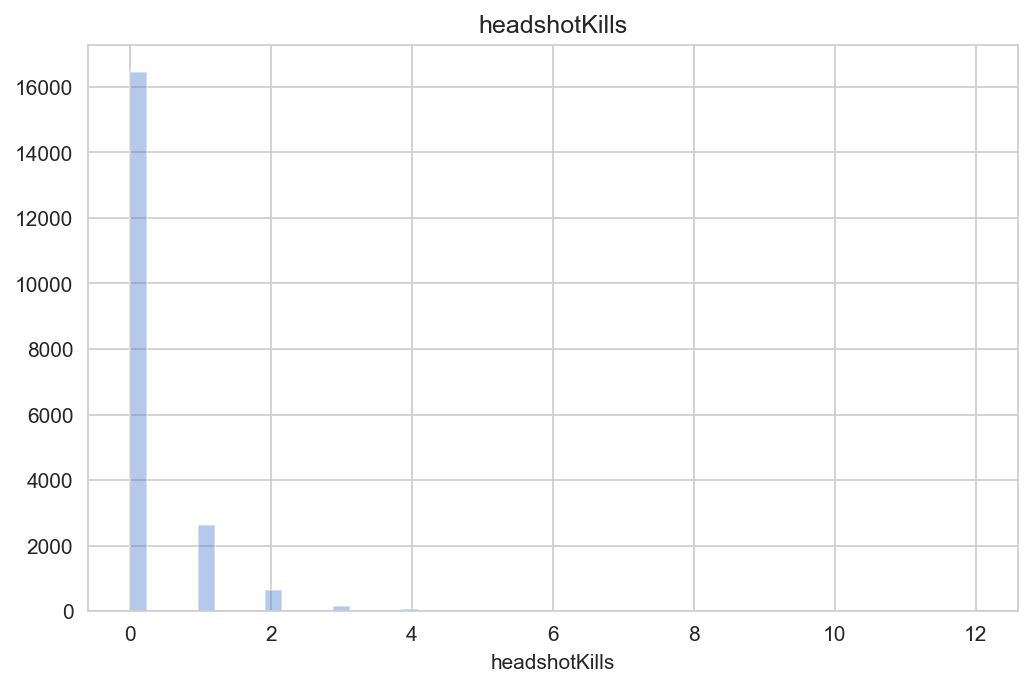

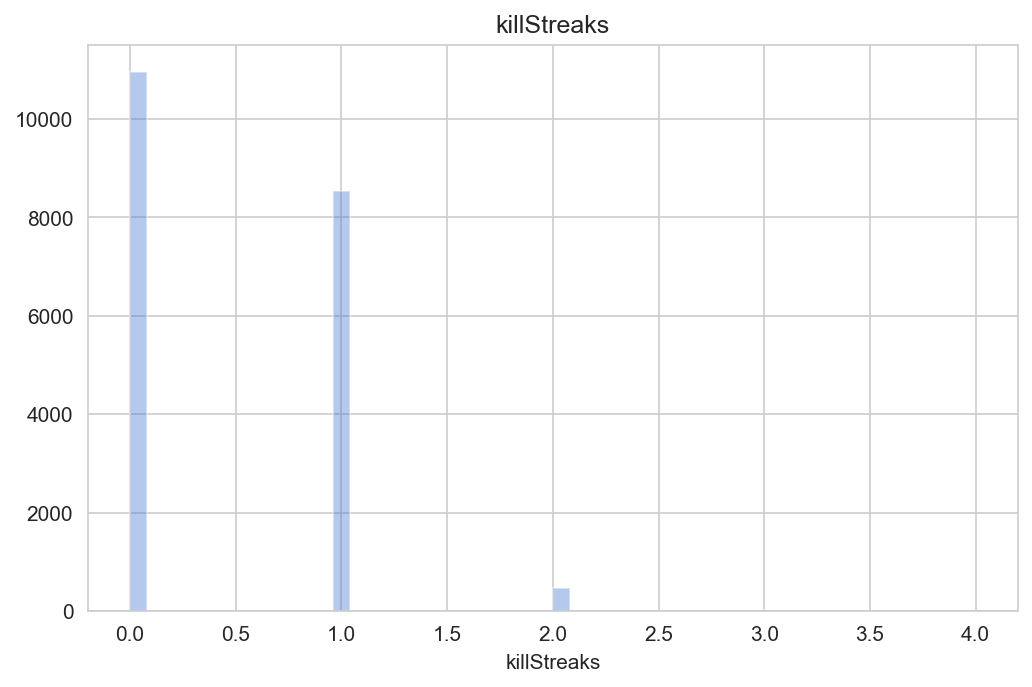

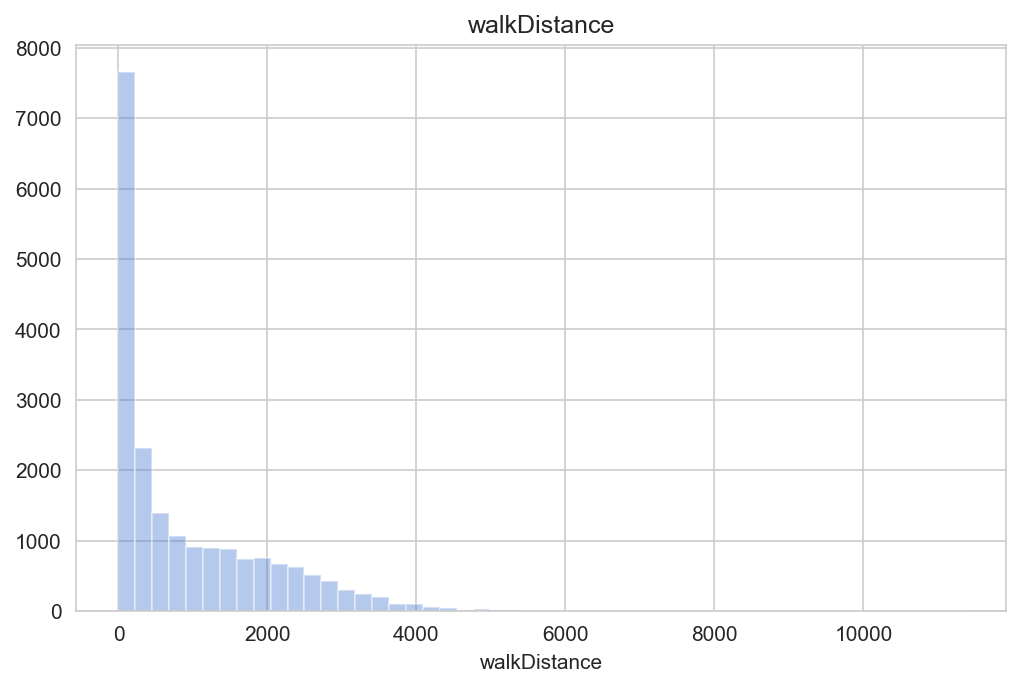

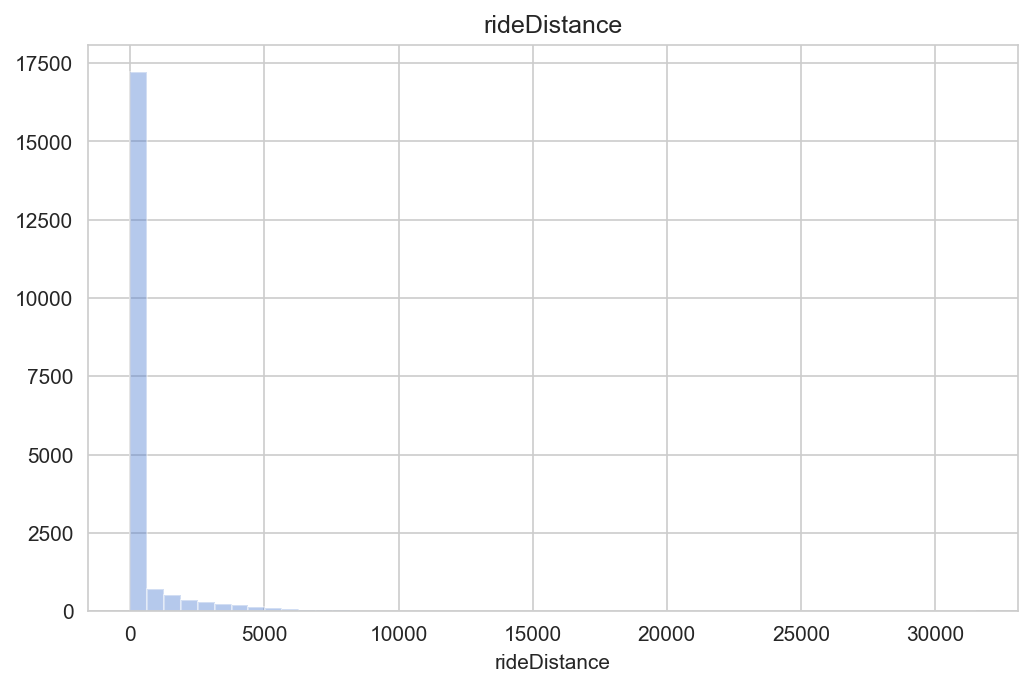

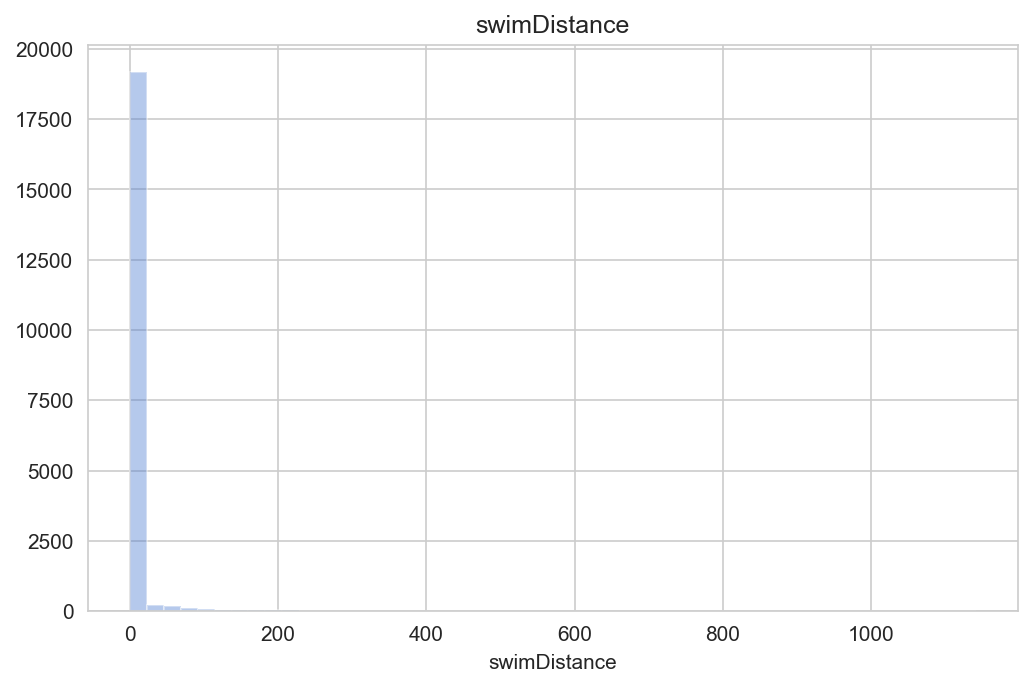

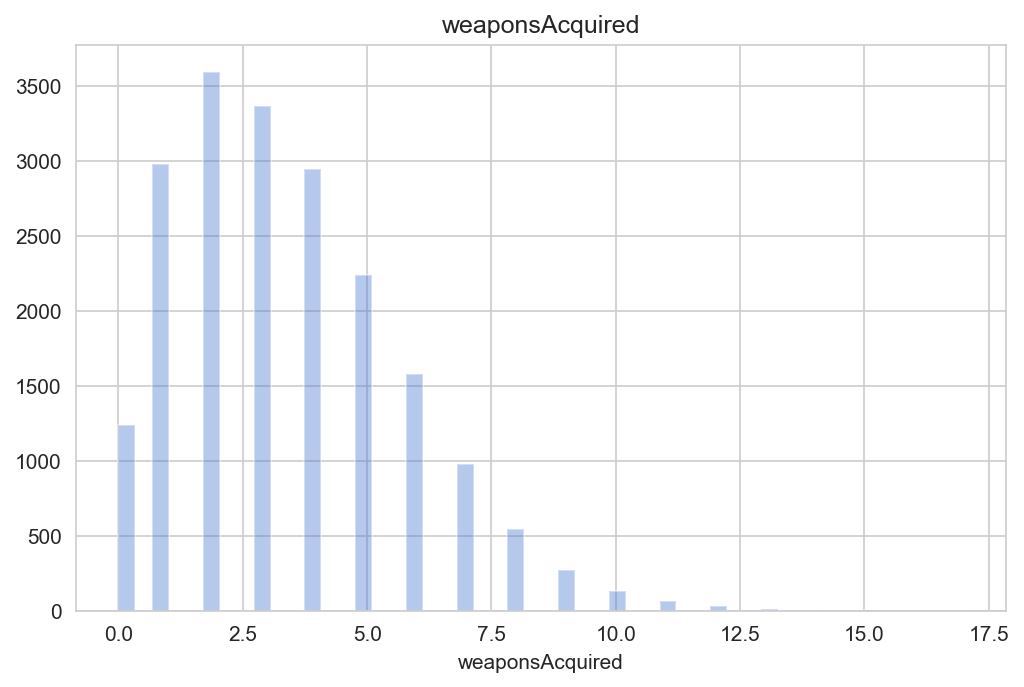

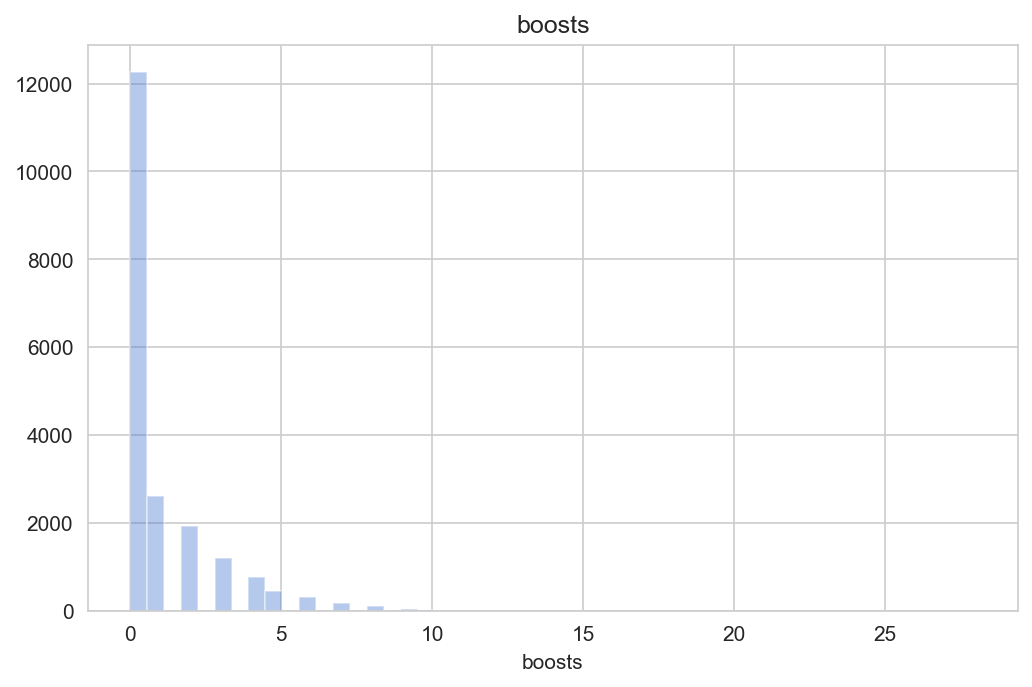

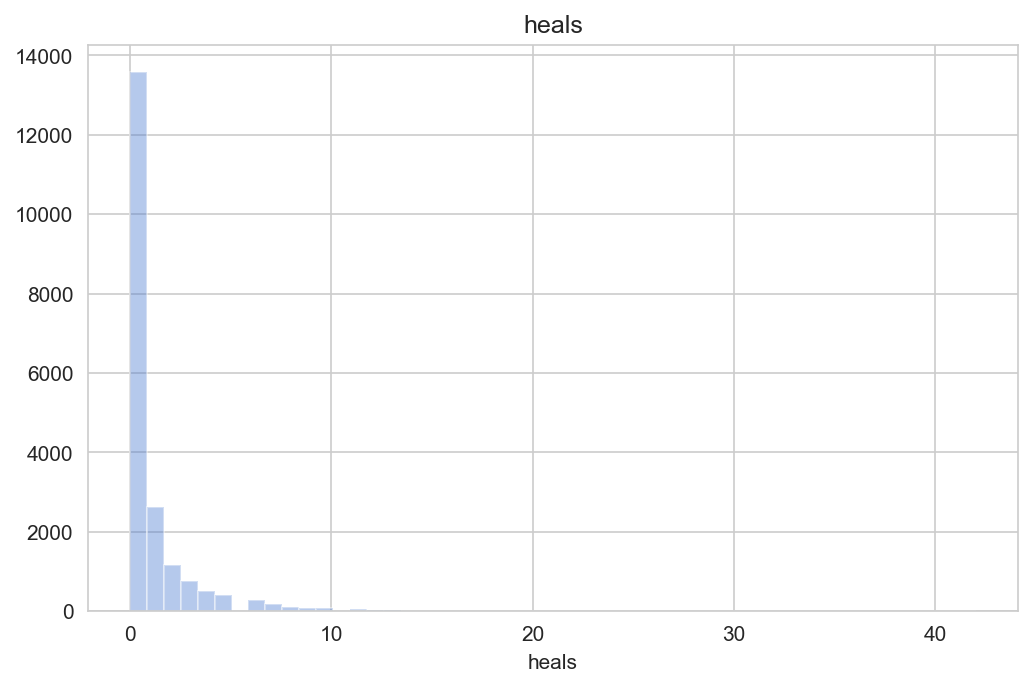

In [14]:
columns = ['damageDealt', 'kills', 'headshotKills', 'killStreaks', 'walkDistance', 
           'rideDistance', 'swimDistance', 'weaponsAcquired', 'boosts', 'heals']

for col in columns:
    create_fig()
    plt.title(col)
    sns.distplot(train[col], kde=False)
    plt.xlabel(col)

## correlation

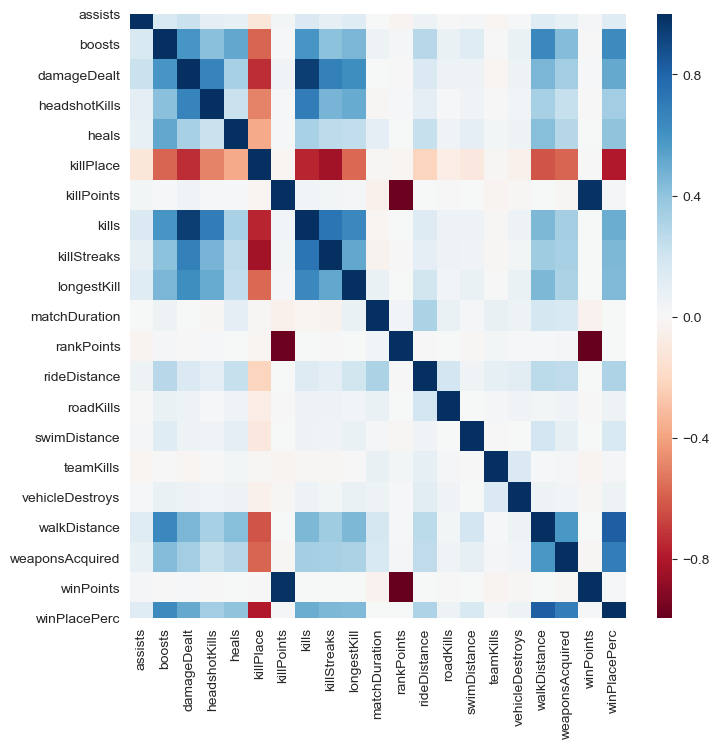

In [21]:
correlation = train.corr()

create_fig(figsize=(8, 8), dpi=100)
sns.heatmap(correlation, cmap="RdBu", cbar_kws={"orientation": "vertical", "aspect": 40})

In [22]:
correlation['winPlacePerc'].sort_values()

killPlace         -0.794070
rankPoints         0.003775
matchDuration      0.004907
winPoints          0.016158
killPoints         0.018518
teamKills          0.021381
vehicleDestroys    0.050128
roadKills          0.052553
assists            0.122438
swimDistance       0.165738
rideDistance       0.308866
headshotKills      0.348342
heals              0.405962
longestKill        0.446094
killStreaks        0.448058
kills              0.498200
damageDealt        0.509663
boosts             0.638136
weaponsAcquired    0.690435
walkDistance       0.821067
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

## Dendogram of correlation

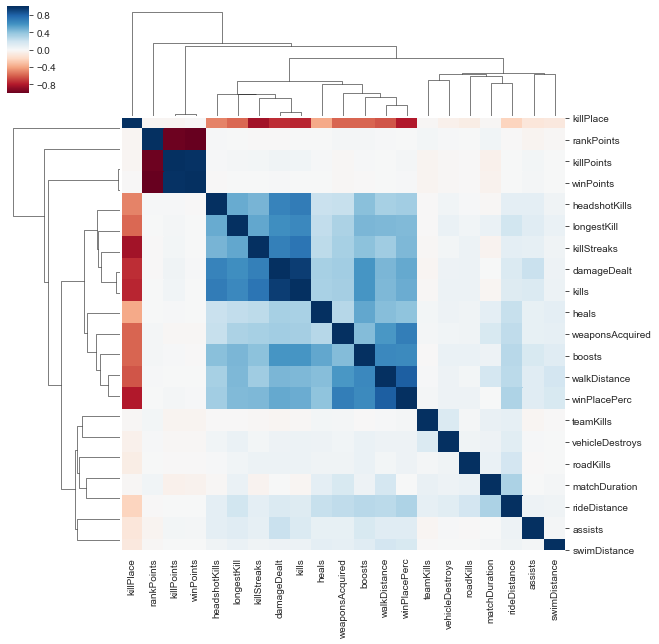

In [23]:
sns.clustermap(correlation, cmap='RdBu')

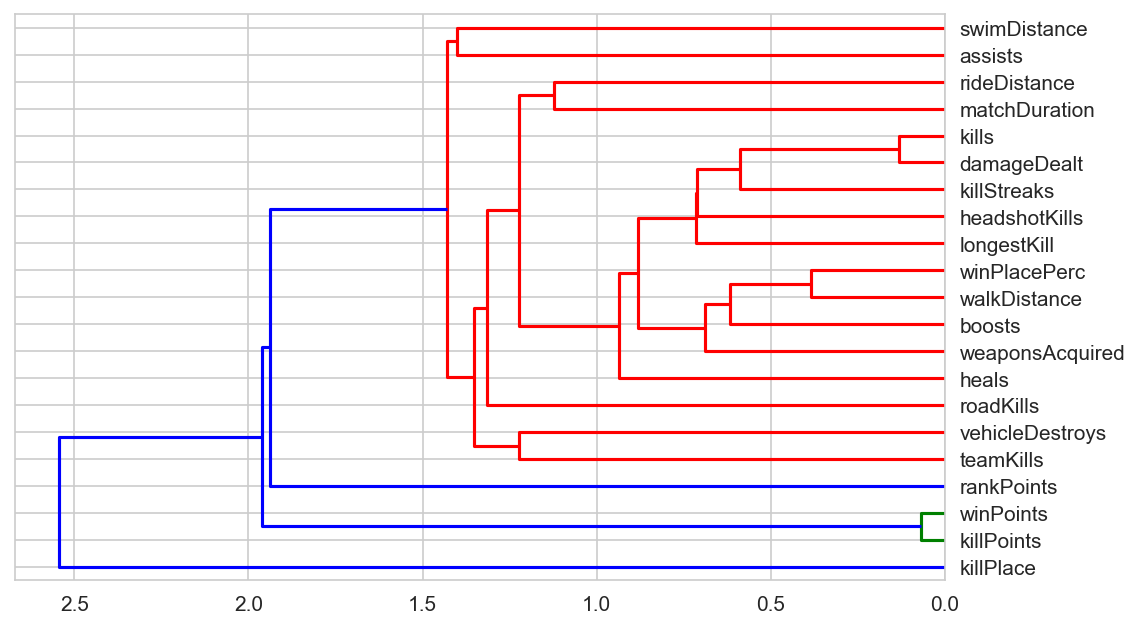

In [24]:
link = linkage(correlation)
create_fig()
dendrogram(link, labels=correlation.index, orientation="left")
plt.show()